##基礎演習S 後半第4回

NE21-1228F
鈴木　拓己

In [1]:
# 参考：インストール済みパッケージ
p <- installed.packages()
rownames(p)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


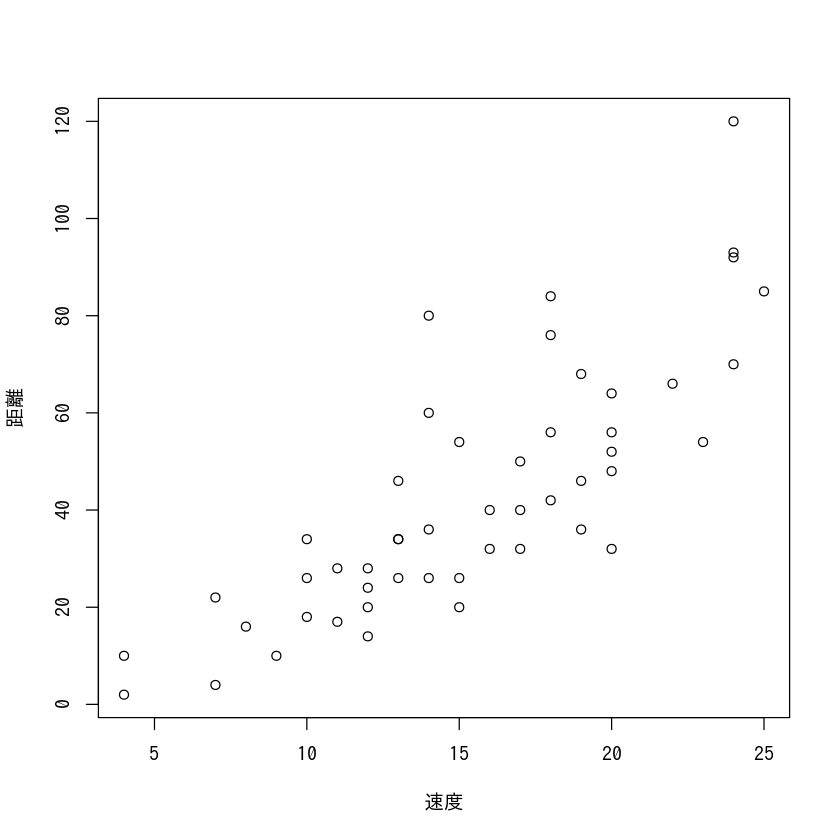

In [2]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")
# 確認（グラフでの日本語）
dat <- cars
head(dat, 3)
colnames(dat) <- c("速度","距離")
plot(dat)

In [3]:
# ライブラリ
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# パッケージインストールと事前確認
# https://topepo.github.io/caret/train-models-by-tag.html#random-forest
#if(!require("rf")){install.packages("rf")}; library(rf)     # rfは使えない！
if(!require("ranger")){install.packages("ranger")}; library(ranger)

if(!require("caret")){install.packages("caret")}; library(caret)
if(!require("doParallel")){install.packages("doParallel")}; library(doParallel)
if(!require("tictoc")){install.packages("tictoc")}; library(tictoc)
library(tidyverse)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



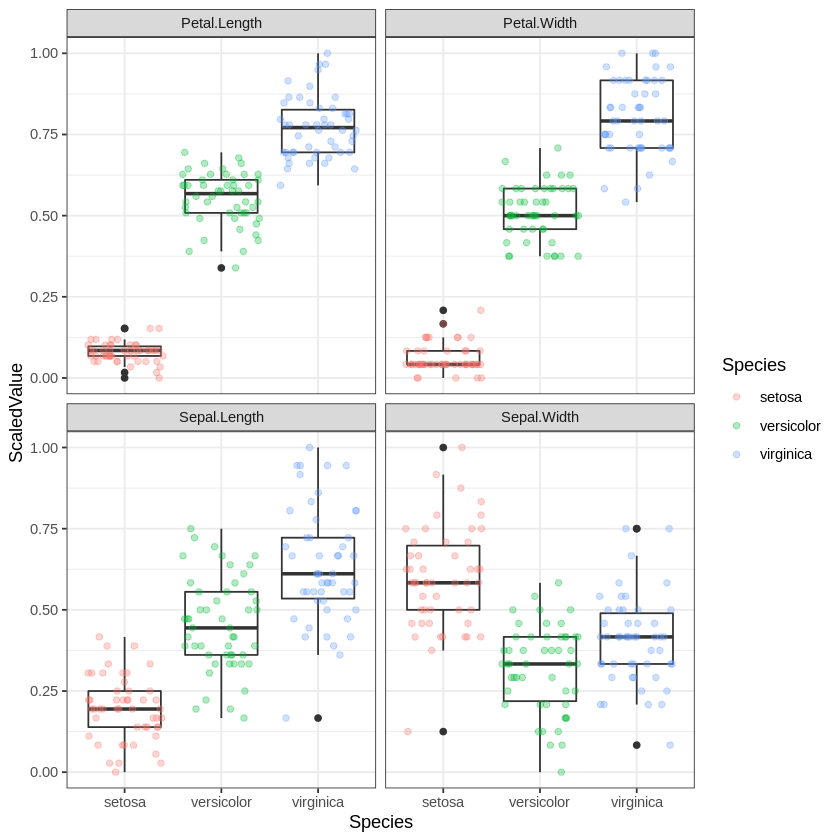

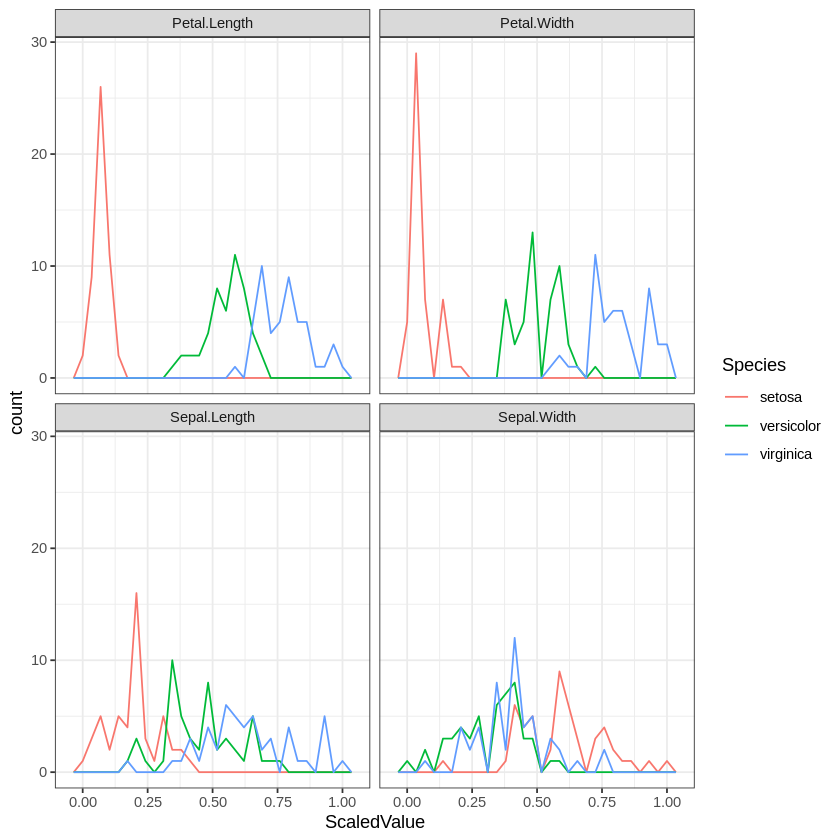

In [5]:
#----------------------------
# データ読み込み
#summary(iris)
dat <- iris
y <- iris$Species
#y <- data.frame(Species=dat$Species)
#----------------------------
# データ視覚化
df <- 
  dat %>%
  pivot_longer(col = -Species, names_to = "key", values_to = "value") %>%
  group_by(key) %>% 
  mutate(ScaledValue=(value-min(value))/(max(value)-min(value))) # min-max正規化
summary(dat)
# 箱ひげ図（box plot）
ggplot(df,aes(x=Species,y=ScaledValue))+
  theme_bw()+
  geom_boxplot()+
  geom_jitter(aes(color=Species),alpha=.3)+
  facet_wrap(~key)
# 度数分布多角形（frequency polygon）
ggplot(df,aes(color=Species,x=ScaledValue))+
  theme_bw()+
  geom_freqpoly()+
  facet_wrap(~key)
#----------------------------
# データ分割（訓練データとテストデータ）
set.seed(123)     # 再現性のため乱数種設定
id <- createDataPartition(y=dat[,5], p=0.7, list=FALSE)
# 訓練データ
dat_train <- dat[id,]; y_train <- y[id]
# テストデータ
dat_test <- dat[-id,]; y_test <- y[-id]
#----------------------------
# 数値データの欠損値補完　なし
# missingdata_model <- preProcess(as.data.frame(X_train), method='knnImpute')
# X_train <- predict(missingdata_model, newdata = X_train)
# X_test <- predict(missingdata_model, newdata = X_test)
#----------------------------
# 数値データの正規化・標準化
pp <- preProcess(dat_train[,-5], method = c("center", "scale"))
dat_train[,-5] <- predict(pp, newdata = dat_train[,-5])
dat_test[,-5] <- predict(pp, newdata = dat_test[,-5])

### Ex.4-6：ランダムフォレスト（random forest）
##### irisデータ，rangerパッケージ
##### 参照：Rで決定木分析（rpartによるCARTとrangerによるランダムフォレスト）
##### https://www.marketechlabo.com/r-decision-tree/

In [7]:
# ハイパーパラメータ確認
modelLookup("glmnet")

# gridのデフォルトの定義　※参考用
getModelInfo("glmnet")[[1]]$grid

# ハイパーパラメータのチューニング範囲（グリッド）指定
# gridを指定しないこともできる
grid <- expand.grid(alpha = 1, lambda = c(0, 10^(-4:2)))

# 検証方法設定
tc <-  trainControl(method = "repeatedcv",
          number = 10,          # 10-fold
          repeats = 3,          # 3回繰り返す
          selectionFunction = "best")

# 学習（モデル構築）
set.seed(123)                   # 再現性のため
cores = detectCores() 
cl <- makePSOCKcluster(cores)   # PCのコア数（並列化）
registerDoParallel(cl)
#-----
tic()
model <- train(Species~., data=dat_train,
#              method="ranger", trControl=tc, tuneGrid=grid)
             method="ranger", trControl=tc)    # grid指定しない場合
toc()
stopCluster(cl)

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,glmnet,alpha,Mixing Percentage,TRUE,TRUE,TRUE
2,glmnet,lambda,Regularization Parameter,TRUE,TRUE,TRUE


function (x, y, len = NULL, search = "grid") 
{
    if (search == "grid") {
        out <- expand.grid(alpha = seq(0, 1, length = len), lambda = c(0, 
            10^seq(-1, -4, length = len - 1)))
    }
    else {
        out <- data.frame(alpha = runif(len, min = 0, 1), lambda = 2^runif(len, 
            min = -10, 3))
    }
    out
}

10.472 sec elapsed


[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

,mtry,splitrule,min.node.size
,<dbl>,<fct>,<dbl>
2,2,extratrees,1


Ranger result

Call:
 ranger::ranger(dependent.variable.name = ".outcome", data = x,      mtry = min(param$mtry, ncol(x)), min.node.size = param$min.node.size,      splitrule = as.character(param$splitrule), write.forest = TRUE,      probability = classProbs, ...) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      105 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        extratrees 
Number of random splits:          1 
OOB prediction error:             3.81 % 

Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 94, 94, 94, 94, 93, 96, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9505892  0.9252262
  2     extratrees  0.9603535  0.9399484
  3     gini        0.9505892  0.9252262
  3     extratrees  0.9603535  0.9399484
  4     gini        0.9505892  0.9252262
  4     extratrees  0.9603535  0.9399484

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.

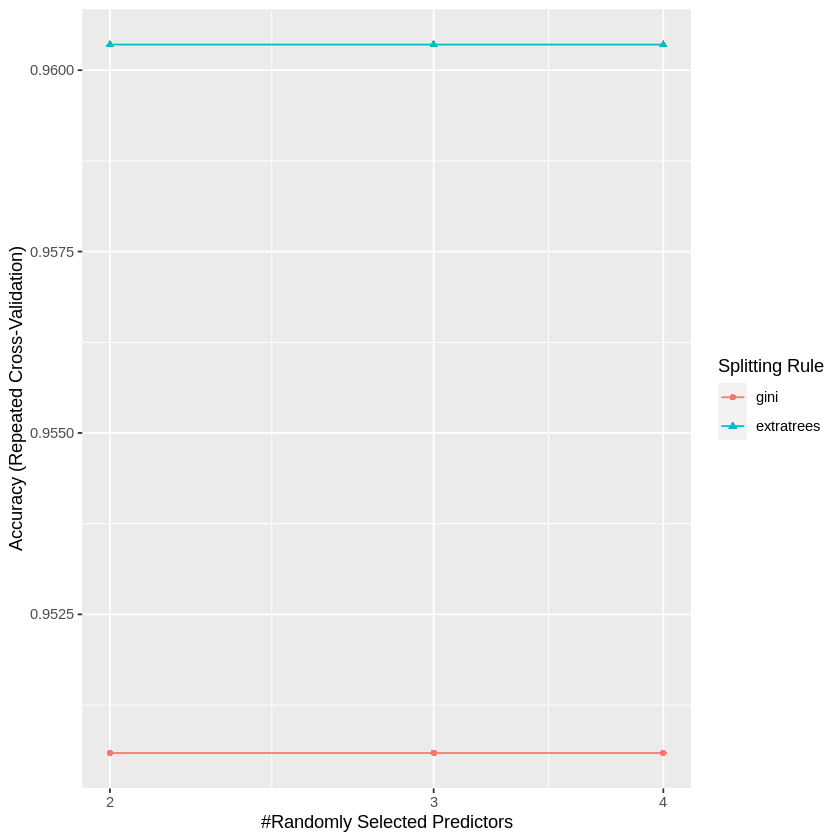

In [8]:
# 検証結果確認(1)
names(model)
# 妥当なハイパーパラメータ
model$bestTune

# 最終モデル
model$finalModel

# モデルの視覚化
#rpart.plot(model$finalModel)   # 使用不可

# モデル概要
model

# ハイパーパラメータとパフォーマンス
ggplot(model) + scale_x_log10()


In [10]:
# 検証結果確認(2)
# 変数重要度
#varImp(model, scale = F) %>% plot()

# パフォーマンス（予測・精度確認）
pred_train <- predict(model, newdata = dat_train) %>% as.factor() # 5列目あっても可
pred_test <- predict(model, newdata = dat_test) %>% as.factor()

# 混同行列（訓練）
confusionMatrix(data = pred_train, y_train)

# 混同行列（テスト）
confusionMatrix(data = pred_test, y_test)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         35         0
  virginica       0          0        35

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9655, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

10.778 sec elapsed


[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

,mtry,splitrule,min.node.size
,<dbl>,<fct>,<dbl>
1,2,gini,1


Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9577778  0.9366667
  2     extratrees  0.9555556  0.9333333
  3     gini        0.9555556  0.9333333
  3     extratrees  0.9555556  0.9333333
  4     gini        0.9577778  0.9366667
  4     extratrees  0.9555556  0.9333333

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 1.

Ranger result

Call:
 ranger::ranger(dependent.variable.name = ".outcome", data = x,      mtry = min(param$mtry, ncol(x)), min.node.size = param$min.node.size,      splitrule = as.character(param$splitrule), write.forest = TRUE,      probability = classProbs, ...) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      150 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             5.33 % 

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9757, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

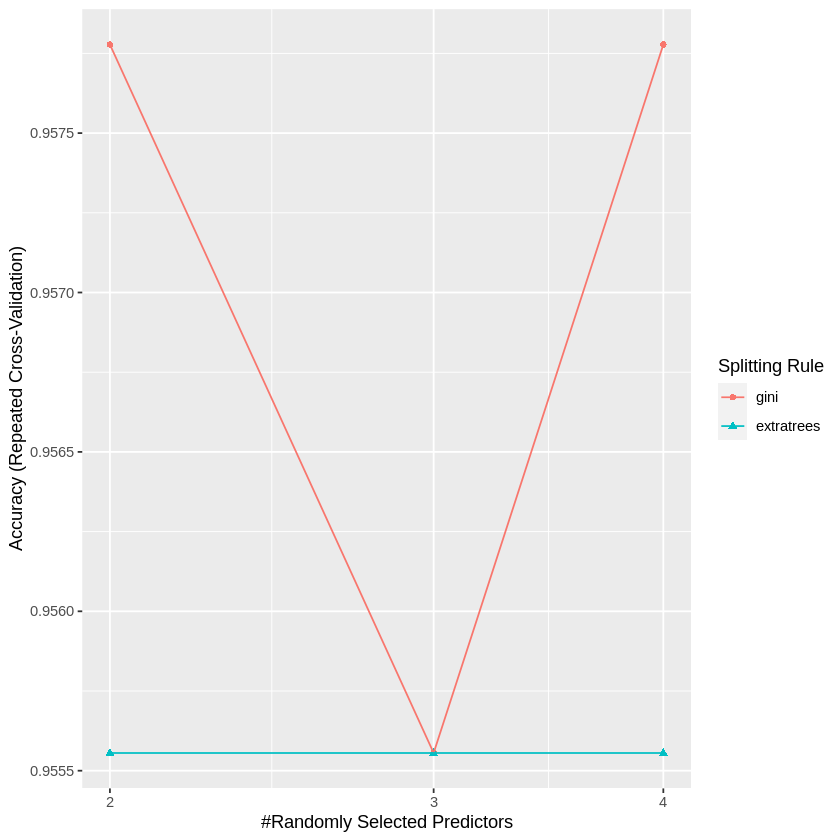

In [17]:
# 最終モデル取得（全データ使用）
# --------------------

# 検証
set.seed(123)
cores = detectCores() 
cl <- makePSOCKcluster(cores)     # PCのコア数（並列化）
registerDoParallel(cl)
# -----
tic()
model <- train(Species~., data=dat,      # 全データ使用
              method="ranger", trControl=tc)
toc()
stopCluster(cl)

# 検証結果確認(1)
names(model)
# 妥当なハイパーパラメータ
model$bestTune

# モデル概要
model

# 最終モデル
model$finalModel

# モデルの視覚化
#rpart.plot(model$finalModel)

# ハイパーパラメータとパフォーマンス
ggplot(model) + scale_x_log10()


# 検証結果確認(2)
# 変数重要度
#varImp(model, scale = F) %>% plot()

# パフォーマンス（予測・精度）確認
pred <- predict(model, newdata = dat) %>% as.factor()
confusionMatrix(data = pred, y)     # 混同行列

